In [1]:
# Audio processing packages
import os
from pydub import AudioSegment
from xml.dom import minidom
import numpy as np
import pandas as pd
from pysndfx import AudioEffectsChain
from librosa import load

# Visualize wav files
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np
import wave
import sys
import scipy
from IPython.display import Audio

In [4]:
emotionfile = 'D://Datasets//SAVEE//DC//Other//' + os.listdir('D://Datasets//SAVEE//DC//Other//')[0]
emotionsound = AudioSegment.from_wav(emotionfile)  # variable crysound hold sound of emotion clip
#emotionsound = emotionsound + np.random.randint(-2,2)  # deamplifying or amplifying the sound  
#emotionsound.export('./file_changed.wav', format='wav')  ### save the new generated file in a folder

In [5]:
def info(wave_file):
    filename = wave_file

    fs, wave = scipy.io.wavfile.read(filename) 
    #Note that this particular file has a single channel. Most audio files will have two (stereo) channels.

    print('Data:', wave)
    print('Sampling rate:', fs)
    print('Audio length:', wave.size/fs, 'seconds')
    print('Lowest amplitude:', min(wave))
    print('Highest amplitude:', max(wave))

    Audio(filename)

In [6]:
def plotwave(fs, signal, maxf=None):
    """Visualize (a segment of) a wave file."""
    # maxf = maximum number of frames
    frames = scipy.arange(signal.size)   # x-axis
    if maxf:
        plt.plot(frames[:maxf], signal[:maxf])
        plt.xticks(scipy.arange(0, maxf, 0.5*fs), scipy.arange(0, maxf/fs, 0.5))
        plt.show()
    else:
        plt.plot(frames, signal)
        plt.xticks(scipy.arange(0, signal.size, 0.5*fs), scipy.arange(0, signal.size/fs, 0.5))
        plt.show()

In [76]:
def visualize_wav(wave_file):
    #import the pyplot and wavfile modules 

    # Read the wav file (mono)

    samplingFrequency, signalData = wavfile.read(wave_file)

    # Plot the signal read from wav file

    plt.subplot(212)
    plt.title('Spectrogram of a 5-second audio clip')

    plt.plot(signalData)
    plt.xlabel('Sample (frames)')
    plt.ylabel('Amplitude')
    
    plt.subplot(211)
    plt.specgram(signalData,Fs=samplingFrequency)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Frequency')

    plt.show()

In [77]:
# Downsampling by a factor of n removes all but every nth sample from the original sound, 
# and writes a new file with the same pitch as the original.
def downsample(filename, factor):
    """Lower the sampling rate by factor."""
    newfilename = filename[:-4]+'-down'+str(factor)+'.wav'
    fs, wave = scipy.io.wavfile.read(filename)
    newfs = fs/factor
    # fill in the rest
    indices = range(0, wave.size, factor)
    wave = wave[indices]
    scipy.io.wavfile.write(newfilename, newfs, wave)
'''  
downsample('sa1.wav', 2)
downsample('sa1.wav', 4)
downsample('sa1.wav', 8)
downsample('sa1.wav', 12)
''' 

"  \ndownsample('sa1.wav', 2)\ndownsample('sa1.wav', 4)\ndownsample('sa1.wav', 8)\ndownsample('sa1.wav', 12)\n"

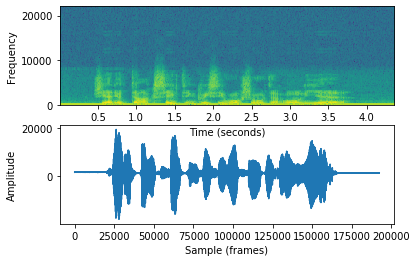

In [78]:
visualize_wav(emotionfile)